Selected Action: left
Updated Epsilon: 1.0


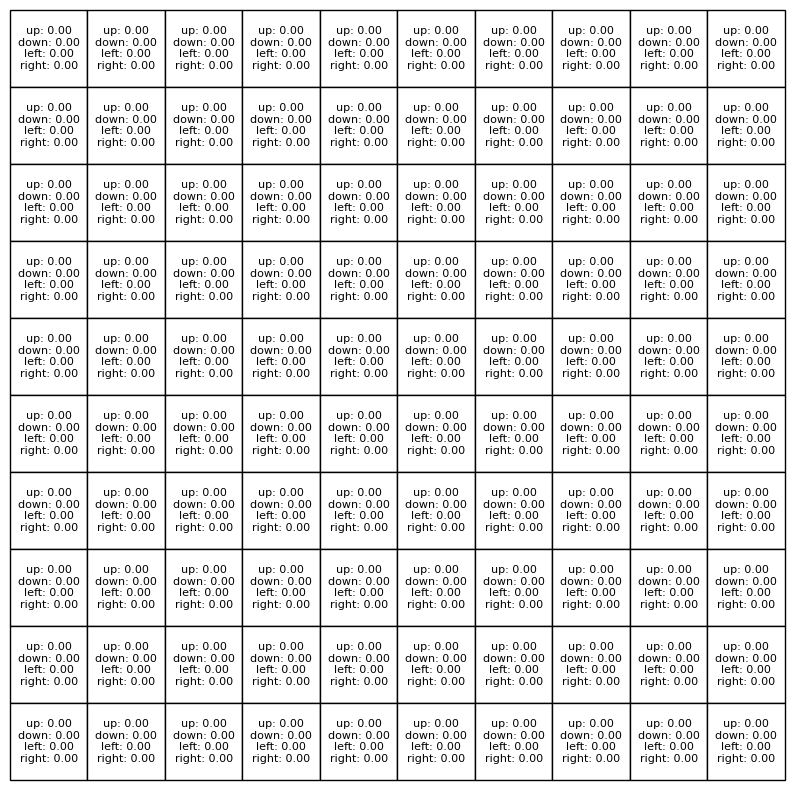

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.table import Table

# Parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 1.0  # Initial exploration rate
min_epsilon = 0.1  # Minimum exploration rate
epsilon_decay = 0.99  # Epsilon decay rate

# Environment setup
grid_size = 10
actions = ['up', 'down', 'left', 'right']
num_actions = len(actions)

# Initialize Q-table with zeros
Q = np.zeros((grid_size, grid_size, num_actions))

# Exploration-Exploitation strategy (greedy)
def choose_action(state):
    """Select action using epsilon-greedy strategy."""
    if random.uniform(0, 1) < epsilon:
        action_idx = random.randint(0, num_actions - 1)
    else:
        # Exploit: Choose the highest Q-value
        action_idx = np.argmax(Q[state[0], state[1]])
    return action_idx
def decay_epsilon():
    """Decay epsilon to prioritize exploitation over time."""
    global epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

# Visualization
def visualize_q_table():
    """Visualize the Q-table as a table."""
    fig, ax = plt.subplots(figsize=(10, 10))  # Create a figure for the table

    # Create a table with grid_size x grid_size
    table = Table(ax, bbox=[0, 0, 1, 1])

    # Add cells to the table for each Q-value (for each state-action pair)
    cell_width = 1.0 / grid_size
    cell_height = 1.0 / grid_size

    # Add state-action Q-values to the table
    for row in range(grid_size):
        for col in range(grid_size):
            q_values = Q[row, col, :]
            text = "\n".join([f"{action}: {q:.2f}" for action, q in zip(actions, q_values)])
            table.add_cell(row, col, width=cell_width, height=cell_height, text=text, loc='center', facecolor='white')

    # Set table properties
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    ax.add_table(table)

    # Hide axes
    ax.axis('off')

    plt.show()

# Example: Choose an action from the starting state and visualize
state = (0, 0)  # Starting state (top-left corner of the grid)
action_idx = choose_action(state)

# Print selected action and updated epsilon value
print(f"Selected Action: {actions[action_idx]}")
print(f"Updated Epsilon: {epsilon}")

# Visualize the Q-table as a table
visualize_q_table()

Iteration 100/1000: Total Reward = 63, Epsilon = 0.10
Iteration 200/1000: Total Reward = 79, Epsilon = 0.10
Iteration 300/1000: Total Reward = 83, Epsilon = 0.10
Iteration 400/1000: Total Reward = 83, Epsilon = 0.10
Iteration 500/1000: Total Reward = 83, Epsilon = 0.10
Midway Q-values:


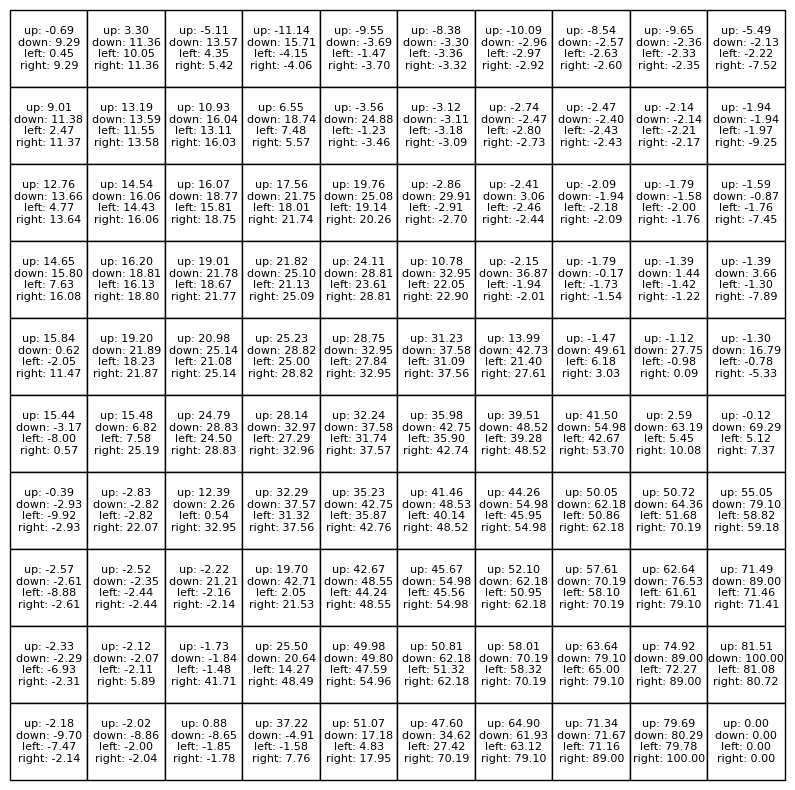

Iteration 600/1000: Total Reward = 71, Epsilon = 0.10
Iteration 700/1000: Total Reward = 81, Epsilon = 0.10
Iteration 800/1000: Total Reward = 79, Epsilon = 0.10
Iteration 900/1000: Total Reward = 81, Epsilon = 0.10
Iteration 1000/1000: Total Reward = 75, Epsilon = 0.10
Training done


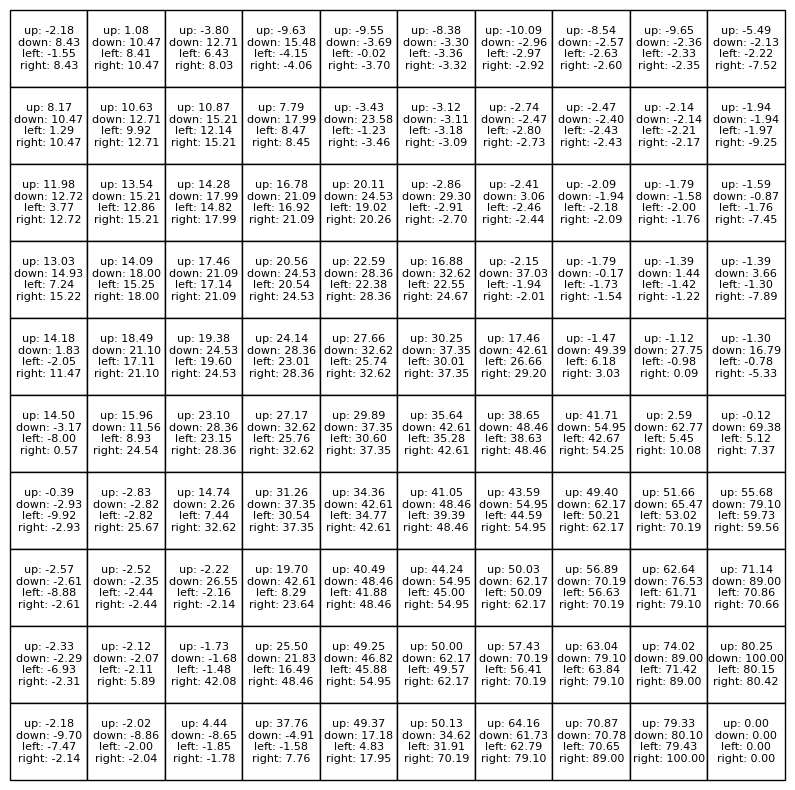

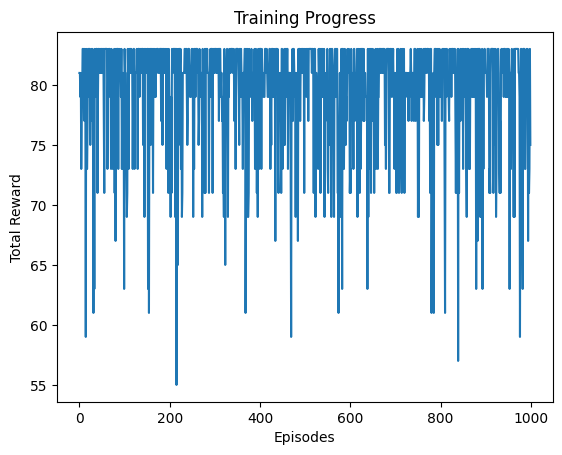

Agent's Path to Goal: [(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (3, 4), (4, 4), (4, 5), (4, 6), (5, 6), (6, 6), (7, 6), (8, 6), (9, 6), (9, 7), (9, 8), (9, 9)]
Agent has learned the optimal policy.


In [ ]:
# training the agent
def simulate_agent():
    """Simulates the agent's movement using the learned policy."""
    state = (0, 0)
    path = [state]

    while state != (grid_size - 1, grid_size - 1):
        action_idx = np.argmax(Q[state[0], state[1]])  # Choose best action
        action = actions[action_idx]
        state, _, _ = perform_action(state, action)  # Perform action
        path.append(state)

    return path


def perform_action(state, action):
    row, col = state
    if action == 'up' and row > 0:
        row -= 1
    elif action == 'down' and row < grid_size - 1:
        row += 1
    elif action == 'left' and col > 0:
        col -= 1
    elif action == 'right' and col < grid_size - 1:
        col += 1

    new_state = (row, col)

    if new_state == (grid_size - 1, grid_size - 1):  # Goal
        reward = 100
        valid = True
    elif new_state == state:  # Invalid move
        reward = -10
        valid = False
    else:  # Valid step
        reward = -1
        valid = False

    return new_state, reward, valid

# training Parameters
total_episodes = 1000
max_steps_per_episode = 100

# monitoring progress
episode_rewards = []

# Training loop
for iterations in range(total_episodes):
    state = (0, 0)
    total_reward = 0J

    for step in range(max_steps_per_episode):
        action_idx = choose_action(state)
        action = actions[action_idx]
        new_state, reward, done = perform_action(state, action)

        # Q-learning update
        current_q = Q[state[0], state[1], action_idx]
        max_future_q = np.max(Q[new_state[0], new_state[1]])
        new_q = (1 - alpha) * current_q + alpha * (reward + gamma * max_future_q)
        Q[state[0], state[1], action_idx] = new_q

        state = new_state
        total_reward += reward

        if done:
            break

    episode_rewards.append(total_reward)
    decay_epsilon()

    if (iterations + 1) % 100 == 0:
      print(f"Iteration {iterations + 1}/{total_episodes}: Total Reward = {total_reward}, Epsilon = {epsilon:.2f}")

    if iterations == total_episodes // 2:
        print("Midway Q-values:")
        visualize_q_table()


print("Training done")


visualize_q_table()


plt.plot(episode_rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Training Progress")
plt.show()

path = simulate_agent()
print("Agent's Path to Goal:", path)

if len(path) <= grid_size + grid_size - 1:
    print("Agent has learned the optimal policy.")
else:
    print("Further training might be needed.")